# Plot variable of a dataframe for values making up more than a specified percentage of the total

When compiling large datasets, you may end up with values in some columns that make up only a small contributio to the total. ***These values may be important and should not jsut be discarded without careful consideration.*** Equally, if they van be discarded, the below helper function can assist - given a dataframe, a specified column (of categorical data) and a threshold cutoff, any values within the column that make up less than the thrshold contrivbution to the total will result in that row of the dataframe being dropped.

The following function does all the work - scroll down further for an example application.

In [135]:
def thin_data(data, variable_to_consider, percentage_cutoff=10, verbose=True):
	"""
	Takes in a dataframe and removes rows where the contribution of categorical variables in a specified column make up 
	less than a defined percentage of the total 

	data=pandas dataframe
	variable_to_consider=name of column
	percentage_cutoff=where entries in the variable_to_consider column make up less than this percetnage, they will be dropped

	RETURNS dataframe 
	"""

	if verbose:
		print("*****")
		print("Trimming dataframe")
		print("Column: %s " %variable_to_consider)
		print("Dropping rows where %s variables make up less than %i %% of the total column composition." %(variable_to_consider,percentage_cutoff))
		print(" ")
		print("%s : %% of total" %variable_to_consider)
		print("----------------")
		print((data[variable_to_consider].value_counts()/data[variable_to_consider].count())*100)
	
	class_percents=(data[variable_to_consider].value_counts()/data[variable_to_consider].count())*100
	class_percents_lessThan_CUTOFF=class_percents[class_percents<percentage_cutoff]
	class_percents_greaterThan_CUTOFF=class_percents.drop(class_percents_lessThan_CUTOFF.index)

	# drop rows where CLASS is > specifid percentage 
	#help: https://stackoverflow.com/questions/12065885/filter-dataframe-rows-if-value-in-column-is-in-a-set-list-of-values
	
	mask_gtCUTOFF=data[variable_to_consider].isin(list(class_percents_greaterThan_CUTOFF.index))
	data_trimmed=data[mask_gtCUTOFF]

	return(data_trimmed)

# Example

Start by creating a selection of random classification values - we'll just use letters for now (but you could use anything):

In [136]:
import numpy as np
import string
class_values=np.random.choice(list(string.ascii_uppercase),  size=(4000))
print("Shape of class_values: ", class_values.shape)
print("Head of class_values: ", class_values[0:10])
type(class_values)

Shape of class_values:  (4000,)
Head of class_values:  ['O' 'C' 'Q' 'O' 'I' 'S' 'M' 'B' 'A' 'L']


numpy.ndarray

Now create a second list of `groups` which we'll number 1 to 5. IN this example, we'll assume that some of the letters in `class_values` belong to 1 of each of these `groups`. This must be the same shape as `class_values`.

In [137]:
groups=np.random.randint(5, size=(4000))
print("Shape of groups: ", groups.shape)
print("Head of groups: ", groups[0:10])
type(groups)

Shape of groups:  (4000,)
Head of groups:  [1 4 2 3 0 1 2 3 4 2]


numpy.ndarray

Now define a dataframe using these data:

In [138]:
import pandas as pd
data=pd.DataFrame({'CLASS':class_values, 'GROUP':groups})
print(data.head())

  CLASS  GROUP
0     O      1
1     C      4
2     Q      2
3     O      3
4     I      0


You can check how many of each `CLASS` you have in each `GROUP`:

In [139]:
data.groupby(["GROUP", "CLASS"]).size()

GROUP  CLASS
0      A        30
       B        37
       C        28
       D        27
       E        32
       F        27
       G        35
       H        29
       I        20
       J        33
       K        18
       L        30
       M        34
       N        41
       O        43
       P        28
       Q        24
       R        35
       S        35
       T        26
       U        34
       V        35
       W        25
       X        42
       Y        35
       Z        28
1      A        34
       B        29
       C        28
       D        35
                ..
3      W        33
       X        29
       Y        15
       Z        23
4      A        33
       B        25
       C        21
       D        22
       E        40
       F        29
       G        40
       H        39
       I        34
       J        31
       K        27
       L        33
       M        32
       N        30
       O        31
       P        33
       Q        35

Just for this example, let's adjust how many of some of the values we've been given so that a few of the letters only appear very occasionally compared to others. We'll reduce 90% of the A - G values we have and replace them with T - Z values.

**If you're using real data, you won't need to do this step**

In [140]:
def replace_percentage_of_values_with_value(data, column, value_to_adjust, replacement_value, portion=.1):
    
    """Replace a fraction of specific string values in a column with another value
    
    data=pandas dataframe
    column=column title
    value_to_adjust=value in column you want to alter
    replacement_value=value used to replace
    portion=fraction of value_to_adjust to be adjusted to replacement_value (.1=10% etc.)
    """
    data.loc[data[data[column].str.match(value_to_adjust)].sample(frac=portion).index,
             column]=replacement_value
    
    return(data)

print("Before replacement:")
print(data['CLASS'].value_counts())
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='A', replacement_value='Z', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='B', replacement_value='Y', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='C', replacement_value='X', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='D', replacement_value='W', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='E', replacement_value='V', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='F', replacement_value='U', portion=.9)
data=replace_percentage_of_values_with_value(data, column='CLASS', value_to_adjust='G', replacement_value='T', portion=.9)
print("After replacement:")
data['CLASS'].value_counts()

Before replacement:
G    172
O    169
P    168
M    165
N    165
E    161
V    160
A    160
S    159
H    158
U    157
Q    157
I    157
J    154
X    153
R    151
T    149
Z    147
K    146
L    145
W    145
B    144
C    143
D    139
F    139
Y    137
Name: CLASS, dtype: int64
After replacement:


V    305
T    304
Z    291
X    282
U    282
W    270
Y    267
O    169
P    168
M    165
N    165
S    159
H    158
Q    157
I    157
J    154
R    151
K    146
L    145
G     17
A     16
E     16
D     14
C     14
F     14
B     14
Name: CLASS, dtype: int64

Let's say you want to plot these - we'll have a go using the [seaborne library](https://seaborn.pydata.org/) using the following function:

In [141]:
import seaborn as sns

def plot_counts_per_group(data, group_variable, class_variable, title_fontsize=12, axis_fontsize=12, title=''):
    sns.set_context("paper", rc={"font.size":axis_fontsize,"axes.titlesize":axis_fontsize,"axes.labelsize":axis_fontsize}) 
    ax=sns.catplot(y=class_variable, kind='count', hue=group_variable, data=data)
    ax.set_axis_labels("count", group_variable)
    ax.set_titles(title)
    return(ax)

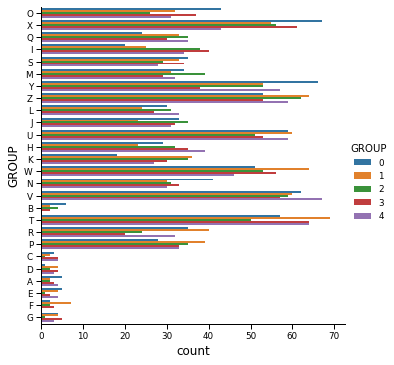

In [142]:
plot_counts_per_group(data, 'GROUP', 'CLASS', title="Letter count per group")

You can see here how the plot has minimal A-G values relative to the others. We'll replot the above now using the function defined at the start to ignore values under a given percentage.

***Please remember that this is presented purely as an example. As stated earlier, you should only ignore specific values if you know they are not required - otherwise you're adjusting the information which is 1. wrong and 2. dangerous!***

So now let's thin out the dataframe based on the `CLASS` column and removing any rows containg values which make up less than 1 % of the total.

In [147]:
data_thinned=thin_data(data, variable_to_consider='CLASS', percentage_cutoff=1)


print(data.head())
print(data_thinned.head())

*****
Trimming dataframe
Column: CLASS 
Dropping rows where CLASS variables make up less than 1 % of the total column composition.
 
CLASS : % of total
----------------
V    7.625
T    7.600
Z    7.275
X    7.050
U    7.050
W    6.750
Y    6.675
O    4.225
P    4.200
M    4.125
N    4.125
S    3.975
H    3.950
Q    3.925
I    3.925
J    3.850
R    3.775
K    3.650
L    3.625
G    0.425
A    0.400
E    0.400
D    0.350
C    0.350
F    0.350
B    0.350
Name: CLASS, dtype: float64
  CLASS  GROUP
0     O      1
1     X      4
2     Q      2
3     O      3
4     I      0
  CLASS  GROUP
0     O      1
1     X      4
2     Q      2
3     O      3
4     I      0


Now re-plot using the `data_thinned` variable:

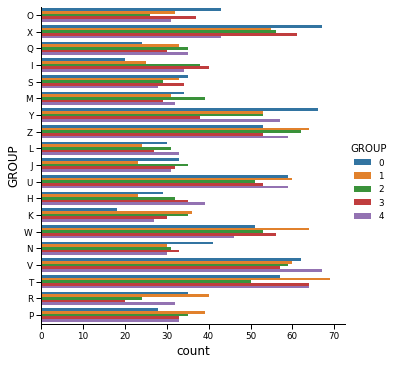

In [150]:
plot_counts_per_group(data_thinned, 'GROUP', 'CLASS', title="CLASS count per group")

We've now removed data that were for this example deemed not to be of interest, resulting in the need to plot less data and therefore providing a chart more suitable for the intended use - in this case, that use being to consider the distribution of `CLASS` values per `GROUP` where letters represented >10 % of the total `CLASS` population.